### Importing libraries and loading data

In [ ]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('train.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Let's take a look how many people survived**

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


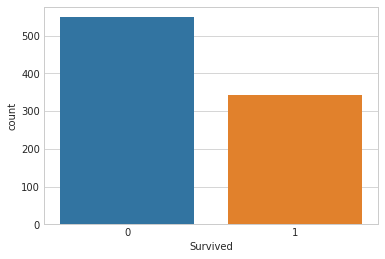

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

In [33]:
survived=sum(df['Survived']==1)
total=len(df['Survived'])
survived_percentage= survived / total
print ('Survived Percentage is: ',survived_percentage )

Survived Percentage is:  0.3838383838383838


As we see, just 38% of people survived from this disaster

**Let's look at survived - sex relation**

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


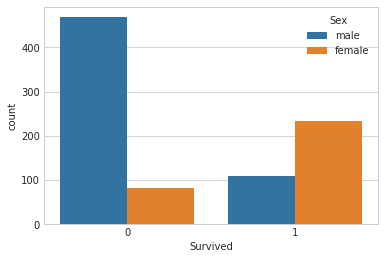

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

Most of the males are doomed and survived females look like twice of the males. 

**Let's see survived - class relation**

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


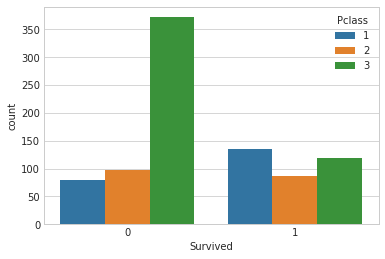

In [40]:
sns.countplot(x='Survived', hue='Pclass', data=df)

([<matplotlib.axis.XTick at 0x7fded5cad198>,
 <a list of 3 Text xticklabel objects>)

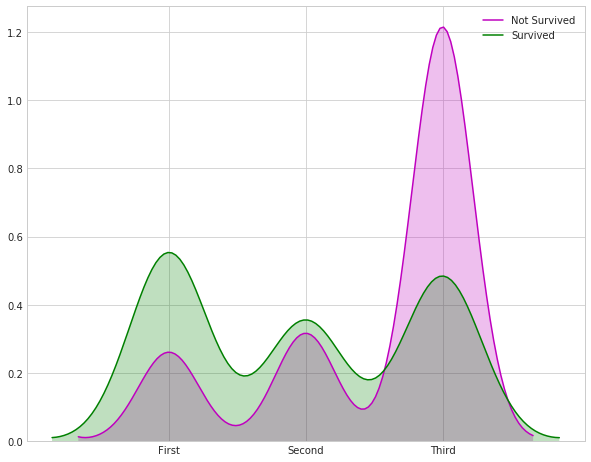

In [41]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='m',label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='g',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)

The most survivals are in first class.

### Handling with missing values

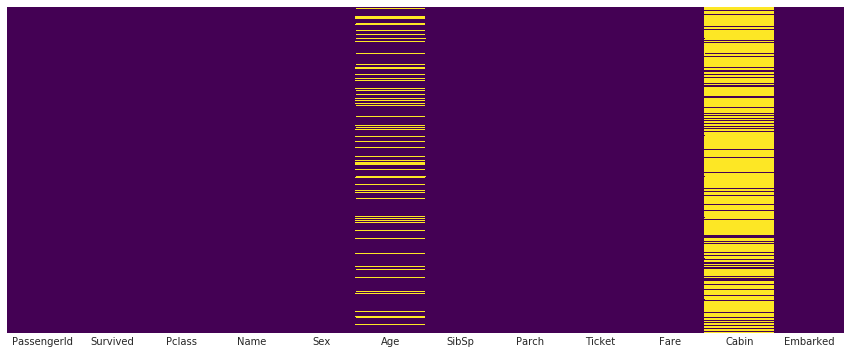

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are null values on Age, Cabin and Embarked columns. We have to take care of these values before applying kNN algorithm

We will fill missing values with mean of age per class. First we will calculate mean of age for each class and then fill the null values with these means.

In [10]:
lst1=[]
lst2=[]
lst3=[]
n=len(df.Survived)
i=0
while i< n:
    if df['Pclass'][i]==1 and pd.isnull(df['Age'][i]) == False:
        lst1.append(df['Age'][i])
    elif df['Pclass'][i]==2  and pd.isnull(df['Age'][i]) == False:
        lst2.append(df['Age'][i])
    elif df['Pclass'][i]==3 and pd.isnull(df['Age'][i]) == False :
        lst3.append(df['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age

In [11]:
df.Age= df[['Age', 'Pclass']].apply(impute, axis=1)

In [12]:
df.groupby('Pclass').agg({'Age':['min', 'max', 'count', 'mean']})

Age                       
         min   max count       mean
Pclass                             
1       0.92  80.0   216  38.233441
2       0.67  70.0   184  29.877630
3       0.42  74.0   491  25.140620

It seems creating a family size feature is a good one

In [13]:
df['family_size'] = df.SibSp + df.Parch+1

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


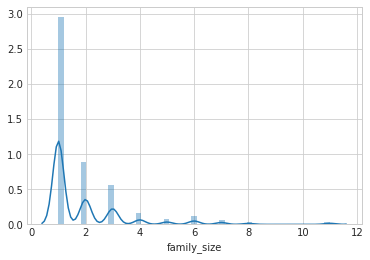

In [48]:
sns.distplot(df.family_size)

In [14]:
df.drop(['Cabin','SibSp'], inplace=True, axis=1)

In [15]:
df.dropna(inplace=True)

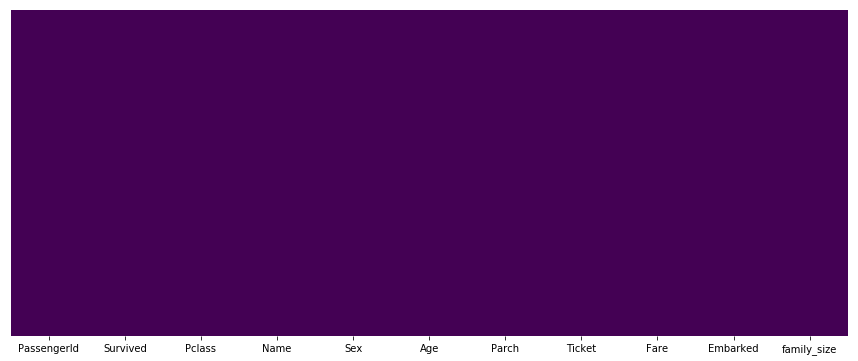

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Finally, we do not have any issing values, we are good to go.

**Dummy Variables**

Since Sex and Embark columns are categorical features, we will use dummy variables instead of these ones.

In [17]:
sex=pd.get_dummies(df.Sex, drop_first=True)

In [18]:
embark=pd.get_dummies(df.Embarked, drop_first=True)

In [19]:
df=pd.concat([df,sex,embark], axis=1)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked,family_size,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500,S,2,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833,C,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S,1,1,0,1


In [21]:
df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [59]:
df.head()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
0,0,3,22.0,0,7.2500,2,1,0,1
1,1,1,38.0,0,71.2833,2,0,0,0
2,1,3,26.0,0,7.9250,1,0,0,1
3,1,1,35.0,0,53.1000,2,0,0,1
4,0,3,35.0,0,8.0500,1,1,0,1


**Correlation Matrix**

In [60]:
df.corr()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
Survived,1.000000,-0.356462,-0.082446,0.095265,0.266100,0.045068,-0.536762,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.365902,0.023666,-0.552893,0.054467,0.150826,0.131989,0.197831
Age,-0.082446,-0.365902,1.000000,-0.187896,0.093143,-0.300699,0.099037,-0.021693,-0.025431
Parch,0.095265,0.023666,-0.187896,1.000000,0.206624,0.815440,-0.249543,-0.009417,0.013259
Fare,0.266100,-0.552893,0.093143,0.206624,1.000000,0.206502,-0.182457,-0.062346,-0.250994
family_size,0.045068,0.054467,-0.300699,0.815440,0.206502,1.000000,-0.210154,0.026754,0.019514
male,-0.536762,0.150826,0.099037,-0.249543,-0.182457,-0.210154,1.000000,-0.027256,0.109078
Q,-0.048966,0.131989,-0.021693,-0.009417,-0.062346,0.026754,-0.027256,1.000000,-0.378859
S,-0.159015,0.197831,-0.025431,0.013259,-0.250994,0.019514,0.109078,-0.378859,1.000000


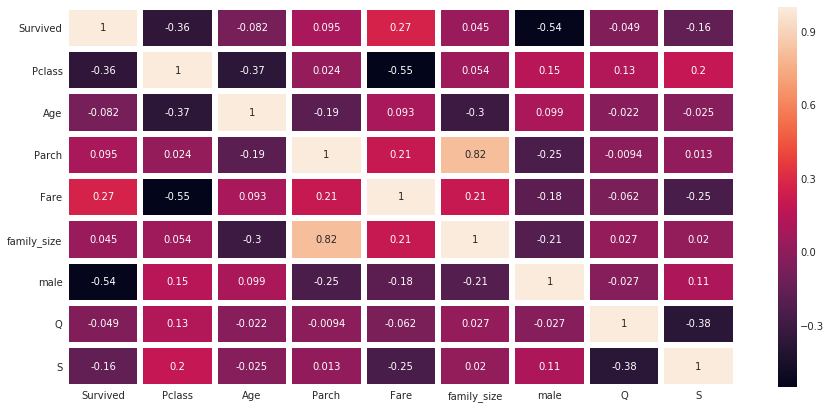

In [61]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),linewidths=5, annot=True)

We see that there is high necative correlation between Survived and males. As we saw before by plots male's survive rate was quite low, so it makes sense that males have negative correlation with survive

Besides, Pclass has negative correlation with survived. Because Pclass 3 is the lowest fare class, and this class was the crowded one, and survive rate was pretty low.

Also, Fare has negative correlation with Pclass, this is because Pclass 3 is the cheapest class.

Parch has high positive correlation with family_size. Because when we were creating family_size feature we have used Parch variable.


### Comparing the Algorithms Performances

We will compare the performances of:
    
    * Support Vector Machine, 
    
    * Decision Tree Classifier,
    
    * Random Forest Classifier,
    
    * Gradient Boosting Classifier,
    
    * XG Boost Classifier

In [22]:
X=df.drop('Survived', axis=1)
y=df.Survived

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

Creating classifier list

In [30]:
classifiers = [
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]
    
log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [31]:
sss=StratifiedShuffleSplit(test_size=0.3,random_state=0)
acc_dict = {}

for train_index,test_index in sss.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    for model in classifiers:
        name = model.__class__.__name__
          
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


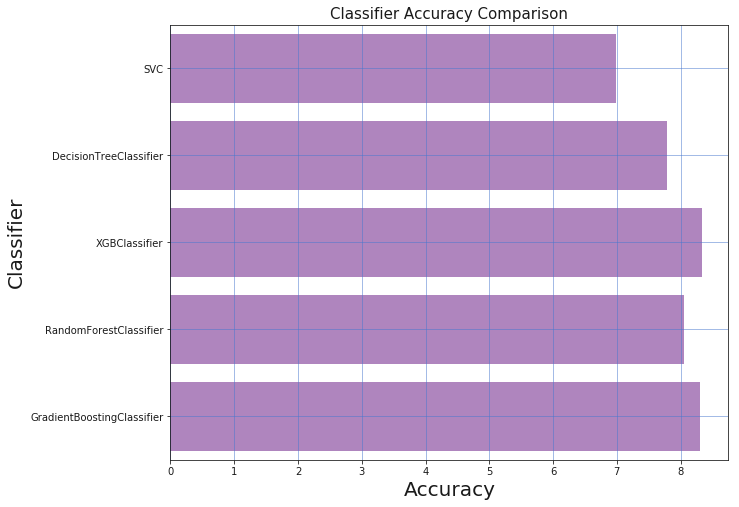

In [35]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()

sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='m')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.title('Classifier Accuracy Comparison',fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.5)

In this particular example, XGB classifier and Gradient Boosting Classifier are the highest accuracy.